In [24]:
%load_ext autoreload
%autoreload 2

-----
# Imports, scraping and initial dataframe 

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split


from deep4deep.text_retrieval import prepare_my_df, get_meta_description_columns
#from deep4deep.text_processing import text_preprocessing, remove_special_chars, remove_punctuation
from deep4deep.description_dataframe_preparation import change_to_categorical
from deep4deep.w2v_embedding_and_rnn_model import Preprocessor, Embedder
from deep4deep.trainer import LSTM_Meta_Trainer

In [26]:
# This the scraping part that will take an hour or two
# Comment it after use to avoid launching twice
# Or, if no or limited new data, skip to next cell

df = pd.read_csv('../raw_data/data2020-12-03.csv')
# if needed, copy this file in deep4deep/raw_data from the Google Drive
# https://drive.google.com/drive/folders/1u-97dBCvEb9ESCcHbU3LjlkCFfOX6-JW

my_df = prepare_my_df(df)

In [27]:
# dropping the "almost_deep_tech" before scraping to save time
my_df = change_to_categorical(my_df)

my_df_with_metatags = get_meta_description_columns(my_df)
my_df_with_metatags.to_csv("my_df_with_metatags.csv", index=False)

http://www.acubens-biotech.com threw an error, trying again without SSL security certificate
website http://www.acubens-biotech.com request threw an error

https://www.air-serenity.com/fr/ threw an error, trying again without SSL security certificate
website https://www.air-serenity.com/fr/ request threw an error

https://www.anatoscope.com/ threw an error, trying again without SSL security certificate
https://www.angus.ai/ threw an error, trying again without SSL security certificate
http://corwave.fr threw an error, trying again without SSL security certificate
http://www.crosslux.eu/ threw an error, trying again without SSL security certificate
website http://www.crosslux.eu/ request threw an error

http://www.diamlite.com threw an error, trying again without SSL security certificate
website http://www.diamlite.com request threw an error

https://www.enancio.com/ threw an error, trying again without SSL security certificate
website https://www.enancio.com/ request threw an error

ht

Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


http://www.nanogenpharma.com/ threw an error, trying again without SSL security certificate
https://netri.fr/ threw an error, trying again without SSL security certificate
http://nexxai.com/ threw an error, trying again without SSL security certificate
website http://nexxai.com/ request threw an error

http://www.nixys-medical.com/ threw an error, trying again without SSL security certificate
website http://www.nixys-medical.com/ request threw an error

https://www.nutriearth.fr/ threw an error, trying again without SSL security certificate
website https://www.nutriearth.fr/ request threw an error



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


http://www.pixmap3d.com/ threw an error, trying again without SSL security certificate
website http://www.pixmap3d.com/ request threw an error

http://precogs.com threw an error, trying again without SSL security certificate
http://www.progelife.com/ threw an error, trying again without SSL security certificate
https://regaind.io threw an error, trying again without SSL security certificate
website https://regaind.io request threw an error

http://sim-and-cure.com threw an error, trying again without SSL security certificate
http://www.ultimetas.com/ threw an error, trying again without SSL security certificate
website http://www.ultimetas.com/ request threw an error

http://yealth.io threw an error, trying again without SSL security certificate
website http://yealth.io request threw an error

http://www.corwave.com threw an error, trying again without SSL security certificate
https://whitelabgenomics.com/ threw an error, trying again without SSL security certificate
http://www.vfbiosc

In [ ]:
# Alternatively, you can read the existing dataframe (copy it in deep4deep/raw_data from the Google Drive
# https://drive.google.com/drive/folders/1u-97dBCvEb9ESCcHbU3LjlkCFfOX6-JW)
# Or tweak the code to only add new data
my_df_with_metatags = pd.read_csv("my_df_with_metatags.csv")

---
# Initializing and training the LSTM Recurrent Neural Netwok model

In [29]:
# adding the 'full_text' column
my_df_with_metatags['full_text'] = my_df_with_metatags.dealroom_meta_description + " " + my_df_with_metatags.meta_description

In [35]:
# Again, this takes a long time, so launch it only once, then comment
#embedder = Embedder()

In [32]:
preprocessor = Preprocessor()
trainer = LSTM_Meta_Trainer(preprocessor, embedder)

initializing Preprocessor
initializing Trainer
initializing LstmModel


In [46]:
# Preparing train_set and val_set

train_set, val_set =  train_test_split(my_df_with_metatags, test_size=.1)
# setting a fraction aside for performance measurement. 
# If you want an unbiased measurement of performance, set aside another chunk for final testing
# We did not because labelled data was in limited supply
# If it is the final training abefore deployment and you just want a fraction for EarlyStopping, set test_size to 0.1 

fitting the model. this may take a few minutes.
Epoch 1/500
19/19 [==============================] - 2s 118ms/step - loss: 0.1338 - mae: 0.2900 - mse: 0.1338 - accuracy: 0.8221 - val_loss: 0.1511 - val_mae: 0.3081 - val_mse: 0.1511 - val_accuracy: 0.7615
Epoch 2/500
19/19 [==============================] - 2s 121ms/step - loss: 0.1352 - mae: 0.2877 - mse: 0.1352 - accuracy: 0.8111 - val_loss: 0.1201 - val_mae: 0.2626 - val_mse: 0.1201 - val_accuracy: 0.8462
Epoch 3/500
19/19 [==============================] - 2s 119ms/step - loss: 0.1237 - mae: 0.2698 - mse: 0.1237 - accuracy: 0.8357 - val_loss: 0.1221 - val_mae: 0.2622 - val_mse: 0.1221 - val_accuracy: 0.8462
Epoch 4/500
19/19 [==============================] - 2s 127ms/step - loss: 0.1170 - mae: 0.2643 - mse: 0.1170 - accuracy: 0.8434 - val_loss: 0.1216 - val_mae: 0.2692 - val_mse: 0.1216 - val_accuracy: 0.8308
Epoch 5/500
19/19 [==============================] - 2s 121ms/step - loss: 0.1125 - mae: 0.2521 - mse: 0.1125 - accuracy: 0.

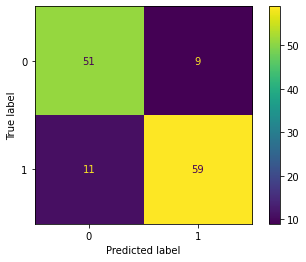

85.0	87.0	84.0	86.0


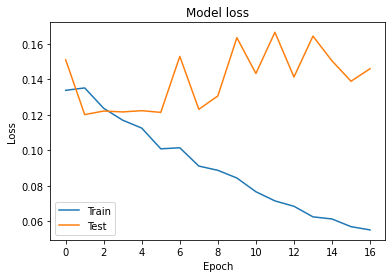

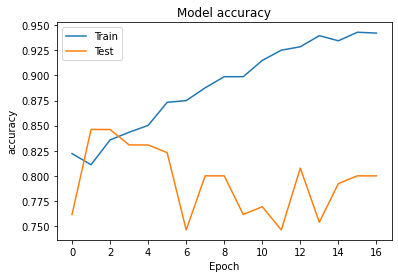

lstm_training 43.87


LstmModel()

In [47]:
trainer.lstm_training(train_set, val_set)

In [48]:
trainer.save_model()

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: deeptech_NLP_model/assets


---


In [770]:
#TODO: le garder qq part
# use trainer.
# calculating dummy baseline by hand
X_val_check2 = pd.DataFrame(X_val_check)
X_val_check2['y_pred'] = y_train.mean()
X_val_check2['y_true'] = y_val
X_val_check2['y_pred_binary'] = [1 if item >threshold else 0 for item in X_val_check2.y_pred]

condition_target_1 = (X_val_check2.y_true==1.0)
condition_pred_1 = (X_val_check2.y_pred_binary==1)
X_val_check2['TP'] = condition_target_1 & condition_pred_1
X_val_check2['TN'] = ~condition_target_1 & ~condition_pred_1
X_val_check2['FP'] = ~condition_target_1 & condition_pred_1
X_val_check2['FN'] = condition_target_1 & ~condition_pred_1

[autoreload of deep4deep.text_processing failed: Traceback (most recent call last):
  File "/Users/admin/.pyenv/versions/data/envs/NLP/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/Users/admin/.pyenv/versions/data/envs/NLP/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 410, in superreload
    update_generic(old_obj, new_obj)
  File "/Users/admin/.pyenv/versions/data/envs/NLP/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 347, in update_generic
    update(a, b)
  File "/Users/admin/.pyenv/versions/data/envs/NLP/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 266, in update_function
    setattr(old, name, getattr(new, name))
ValueError: text_preprocessing() requires a code object with 0 free vars, not 1
]
[autoreload of deep4deep.text_retrieval failed: Traceback (most recent call last):
  File "/Users/admin/.pyenv/versions/data/envs/NLP/l